# 10. Clustering Exercise (30 points) ✔
## Objective:
To categorize the countries using socio-economic and health factors that determine the overall development of the country.

## Problem Statement:
HELP International has been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively.  Hence, your Job as a Data scientist is to categorize the countries using some socio-economic and health factors that determine the overall development of the country.


Data

Country information

1. use K-means clustering and Hierarchical clustering to cluster the country into groups. please choose the number of the cluster in a rational reason

2. use PCA to reduce the dimension to 2d, and visualize the cluster from K-means and Hierarchical clustering respectively

3. please write the suggestion to CEO about the country you suggest

In [211]:
import pandas as pd

# read the data "data/country.txt" that is in csv format style
data = pd.read_csv("data/country.txt", sep=",")

print(data.head())

            country  child_mort  exports  health  imports  income  inflation  \
0          Mongolia        26.1     46.7    5.44     56.7    7710      39.20   
1             Sudan        76.7     19.7    6.32     17.2    3370      19.60   
2            Malawi        90.5     22.8    6.59     34.9    1030      12.10   
3           Belgium         4.5     76.4   10.70     74.7   41100       1.88   
4  Congo, Dem. Rep.       116.0     41.1    7.91     49.6     609      20.80   

   life_expec  total_fer   gdpp  
0        66.2       2.64   2650  
1        66.3       4.88   1480  
2        53.1       5.31    459  
3        80.0       1.86  44400  
4        57.5       6.54    334  


In [212]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     151 non-null    object 
 1   child_mort  151 non-null    float64
 2   exports     151 non-null    float64
 3   health      151 non-null    float64
 4   imports     151 non-null    float64
 5   income      151 non-null    int64  
 6   inflation   151 non-null    float64
 7   life_expec  151 non-null    float64
 8   total_fer   151 non-null    float64
 9   gdpp        151 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 11.9+ KB
None


In [213]:
print(data.describe())

       child_mort     exports      health     imports         income  \
count  151.000000  151.000000  151.000000  151.000000     151.000000   
mean    37.905960   40.447013    6.790530   46.351430   17899.423841   
std     40.749021   28.196914    2.781353   24.614163   19801.730058   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      7.850000   22.800000    4.850000   29.950000    3850.000000   
50%     19.100000   34.800000    6.220000   43.000000   10400.000000   
75%     60.400000   50.950000    8.690000   57.500000   26200.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  151.000000  151.000000  151.000000     151.000000  
mean     7.857536   70.774172    2.934305   13636.324503  
std     10.973978    9.011529    1.512132   18766.269648  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.730000   65.450000    1.820000    1485.000000

=> seems legit so far

# data cleaning

In [214]:
# check for missing values for each column
print(data.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


=> no missing values

# Datenbeschreibung: Socio-ökonomische und Gesundheitsfaktoren

Es ist wichtig, die Bedeutung der einzelnen Merkmale zu verstehen, um die Länder entsprechend ihrer Entwicklung zu kategorisieren. Deshalb hier eine Auflistung:
(Infos von https://www.kaggle.com/code/amritachatterjee09/clustering-help-international-ngo-aid)

- **country**: Name des Landes

- **child_mort**: Kindersterblichkeitsrate (Todesfälle unter 5 Jahren pro 1000 Lebendgeburten)
  - Gesundheitsindikator; hohe Werte weisen auf schlechte Gesundheitsversorgung, Mangelernährung und unzureichende Lebensbedingungen hin.

- **exports**: Exporte von Waren und Dienstleistungen pro Kopf (% des BIP pro Kopf)
  - Wirtschaftsstärke; höhere Werte deuten auf eine starke Wirtschaft und gute Handelsbedingungen hin.

- **health**: Gesundheitsausgaben pro Kopf (% des BIP pro Kopf)
  - Investitionen in die Gesundheit; höhere Werte zeigen eine bessere Gesundheitsversorgung und Infrastruktur.

- **imports**: Importe von Waren und Dienstleistungen pro Kopf (% des BIP pro Kopf)
  - Handelsabhängigkeit; höhere Werte können auf eine offene Wirtschaft oder Abhängigkeit von importierten Gütern hinweisen.

- **income**: Nettoeinkommen pro Person
  - Wohlstand; höhere Werte zeigen eine wohlhabendere Bevölkerung und bessere Lebensbedingungen.

- **inflation**: Inflationsrate (jährliches Wachstum des Gesamt-BIP)
  - Preisstabilität; höhere Werte können wirtschaftliche Unsicherheit und sinkende Kaufkraft anzeigen.

- **life_expec**: Lebenserwartung bei der Geburt (Jahre)
  - Gesundheitsindikator; höhere Werte deuten auf eine bessere allgemeine Gesundheit und höhere Lebensqualität hin.

- **total_fer**: Gesamtfruchtbarkeitsrate (Kinder pro Frau)
  - Bevölkerungswachstum; höhere Werte weisen auf eine jüngere Bevölkerung und potenzielle Herausforderungen bei der Bereitstellung von Dienstleistungen hin.

- **gdpp**: BIP pro Kopf (Bruttoinlandsprodukt pro Kopf)
  - Wirtschaftlicher Output; höhere Werte deuten auf eine produktivere Wirtschaft und einen höheren Lebensstandard hin.



## 1. use K-means clustering and Hierarchical clustering to cluster the country into groups. please choose the number of the cluster in a rational reason

In [215]:
# daten für clustering vorbereiten
# 1. features extrahieren
features = data.drop('country', axis=1)

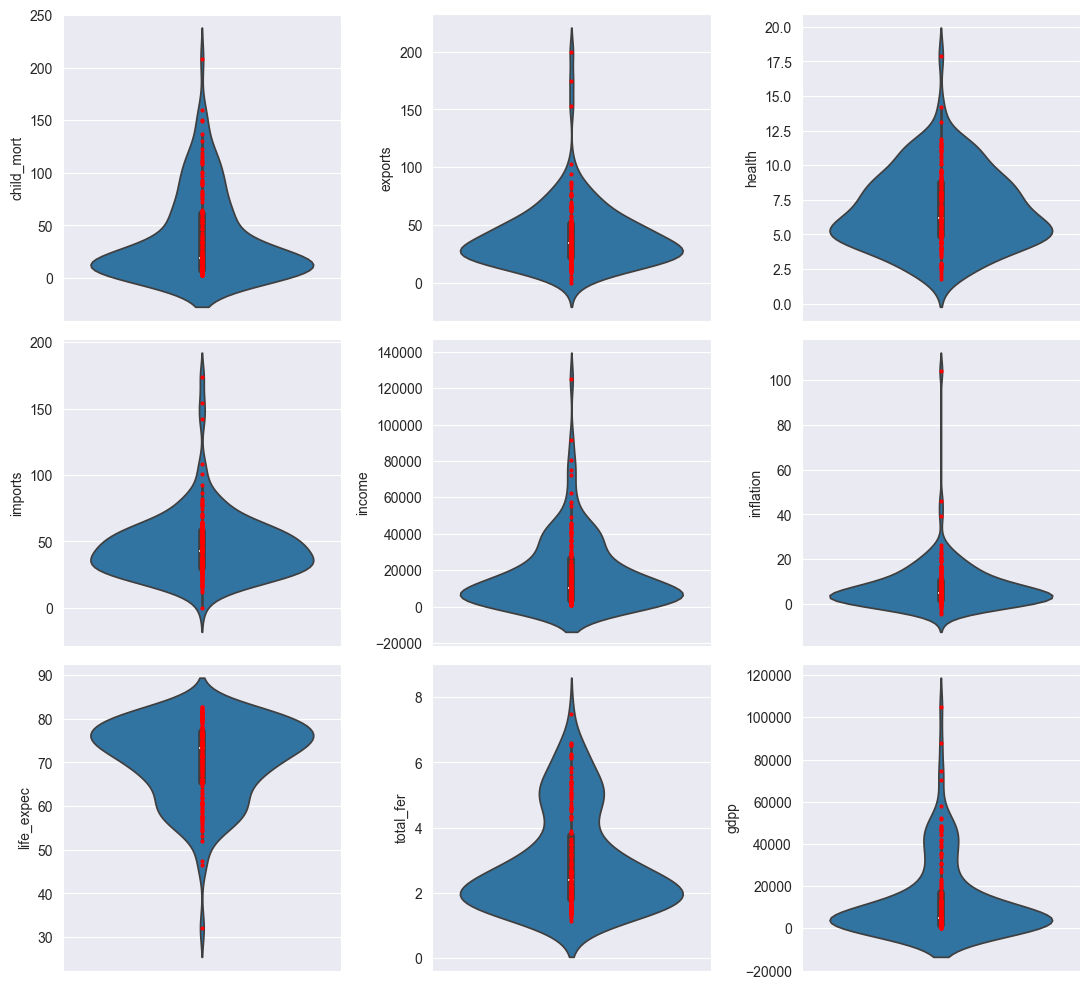

In [216]:
# 2. Ausreißer entfernen (Ausreißer können das Clustering negativ beeinflussen, weil k-means mit Durchschnittswerten arbeitet)
# Verteilungen plotten mit violin plots (und ausreißer anzeigen!)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 10))
for i, column in enumerate(features.columns):
    plt.subplot(3, 3, i + 1)
    # ausreißer anzeigen!
    sns.violinplot(y=column, data=features)
    sns.stripplot(y=column, data=features, color='red', alpha=0.99, size=3, jitter=False)
plt.tight_layout()
plt.show()


In [ ]:
# Erkennen von Ausreißern anhand des IQR (Interquartilsabstand = Q3 - Q1).
# Dabei werden Werte, die mehr als 2.1 * IQR von Q1 oder Q3 entfernt sind, als Ausreißer betrachtet.
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

# ein Faktor von 1.5 wird oft verwendet, um Ausreißer zu identifizieren. Hier wird 2.1 verwendet, um die Daten weniger zu verzerren.
factor = 2.1

# Bedingung für Ausreißer
outliers = ((features < (Q1 - factor * IQR)) | (features > (Q3 + factor * IQR))).sum()

print("Anzahl der Ausreißer pro Merkmal:")
print(outliers)

# Grenzwerte berechnen
lower_bound = Q1 - factor * IQR
upper_bound = Q3 + factor * IQR

# clipping der Ausreißer auf die Grenzwerte
clipped_features = features.clip(lower=lower_bound, upper=upper_bound, axis=1)

# erneut plotten. die Ausreißer werden in rot dargestellt, die geclippten Werte in grün.
plt.figure(figsize=(11, 10))
for i, column in enumerate(clipped_features.columns):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(y=column, data=clipped_features)
    sns.stripplot(y=column, data=features, color='red', alpha=0.99, size=3, jitter=False)
    sns.stripplot(y=column, data=clipped_features, color='green', alpha=0.99, size=3, jitter=False)
plt.tight_layout()
plt.show()


Anzahl der Ausreißer pro Merkmal:
child_mort    1
exports       3
health        1
imports       3
income        4
inflation     3
life_expec    1
total_fer     0
gdpp          7
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardisierung (Skalierung) der Features. Wichtig, da k-means auf Distanzen basiert.
# In diesem Fall wird um den Mittelwert zentriert und auf die Standardabweichung skaliert.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clipped_features)


In [ ]:
#Bestimmen der Anzahl der Cluster mit der Elbow-Methode, um die optimale Anzahl der Cluster zu finden.
# (wird bestimmt durch den Punkt, an dem die WCSS (Within-Cluster-Sum-of-Squares) nicht mehr signifikant abnimmt)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow-Methode
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow-Methode')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('WCSS')
plt.show()


=> Der Knick (Elbow) ist bei 3 Clustern, daher wird die optimale Anzahl der Cluster auf 3 festgelegt.

In [ ]:
# Optimale Clusteranzahl festlegen
optimal_clusters = 3

# K-means Clustering (erzeugt Cluster basierend auf der Distanz der Punkte zueinander)
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Hierarchisches Clustering (erzeugt eine Hierarchie von Clustern;
# kann komplexere Strukturen abbilden als k-means, welches eher "kugelförmige" Cluster bildet)
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Linkage-Matrix erstellen
Z = linkage(scaled_features, method='ward')  # 'ward' um Varianz innerhalb der Cluster zu minimieren

# dendrogramm plotten zur Visualisierung der Clusterbildung
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.xlabel('Länder')
plt.ylabel('Abstand')
plt.show()

# Cluster-Labels extrahieren
hierarchical_labels = fcluster(Z, t=optimal_clusters, criterion='maxclust')


## 2. use PCA to reduce the dimension to 2d, and visualize the cluster from K-means and Hierarchical clustering respectively

In [ ]:
from sklearn.decomposition import PCA

# PCA auf 2 Dimensionen
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# PCA-Ergebnisse als DataFrame
pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])
pca_df['KMeans_Cluster'] = kmeans_labels
pca_df['Hierarchical_Cluster'] = hierarchical_labels
pca_df['Country'] = data['country']


In [ ]:
import seaborn as sns

# K-means Cluster Visualisierung
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=pca_df)
plt.title('K-means Clustering mit PCA')
plt.show()

# Hierarchisches Clustering Visualisierung
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Hierarchical_Cluster', data=pca_df)
plt.title('Hierarchisches Clustering mit PCA')
plt.show()


In [ ]:
# Länder pro Cluster anzeigen nach Hierarchie
print('Länder pro Cluster nach Hierarchie:')
for cluster in range(optimal_clusters):
    print(f'Cluster {cluster + 1}:')
    print(pca_df[pca_df['Hierarchical_Cluster'] == cluster]['Country'].values)
    print()

# Länder pro Cluster anzeigen nach K-means
print('Länder pro Cluster nach K-means:')
for cluster in range(optimal_clusters):
    print(f'Cluster {cluster + 1}:')
    print(pca_df[pca_df['KMeans_Cluster'] == cluster]['Country'].values)
    print()


=> hierarchisches Clustering hat nur 2 Cluster gebildet, während k-means 3 Cluster gebildet hat.

## 3. please write the suggestion to CEO about the country you suggest

'Sudan' 'Malawi' 'Congo, Dem. Rep.' 'Lesotho' 'Burundi' 'Mauritania'
 'Pakistan' 'Kenya' 'Sierra Leone' 'Timor-Leste' 'Comoros' 'Madagascar'
 'Benin' 'Eritrea' 'Iraq' 'Cameroon' 'Uganda' 'Botswana' 'Afghanistan'
 'Haiti' 'Myanmar' 'Gambia' 'Ghana' 'Rwanda' 'South Africa' 'Congo, Rep.'
 'Mozambique' 'Chad' 'Guinea' 'Niger' 'Angola' 'Liberia' 'Yemen'
 'Tanzania' 'Lao' 'Namibia' 'Kiribati' 'Zambia' 'Guinea-Bissau' 'Mali'
 'Central African Republic' 'Nigeria' 'Equatorial Guinea'

=> Das sind die Länder, die durch k-means in das Cluster eingeteilt wurden, deren Länder am meisten Hilfe benötigen. Die Länder haben teilweise unterschiedliche Probleme und wie genau das Geld eingesetzt werden soll, hängt von den spezifischen Bedürfnissen der Länder ab. Es könnte in die Verbesserung der Gesundheitsversorgung, Bildung, Infrastruktur oder Ernährung investiert werden, um die Lebensbedingungen der Menschen zu verbessern und die Entwicklung voranzutreiben.
